In [1]:
!pip install pandas numpy matplotlib scikit-learn dowhy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 24.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.6.7
    Uninstalling cvxpy-1.6.7:
      Successfully uninstalled cvxpy-1.6.7


In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 500

# Advertising expenditure
ad_spend = np.random.normal(100, 20, n)

# Traffic (partially influenced by Ad Spend)
traffic = 50 + 0.8 * ad_spend + np.random.normal(0, 10, n)

# Sales (influenced by both Ad Spend and Traffic)
sales = 30 + 0.5 * ad_spend + 0.3 * traffic + np.random.normal(0, 15, n)

df = pd.DataFrame({
    "Ad_Spend": ad_spend,
    "Traffic": traffic,
    "Sales": sales
})

df.head()


,Ad_Spend,Traffic,Sales
0,109.934283,147.209202,150.120234
1,97.234714,146.881938,136.551444
2,112.953771,126.377341,125.284543
3,130.460597,159.998170,133.525698
4,95.316933,119.747120,124.055952


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


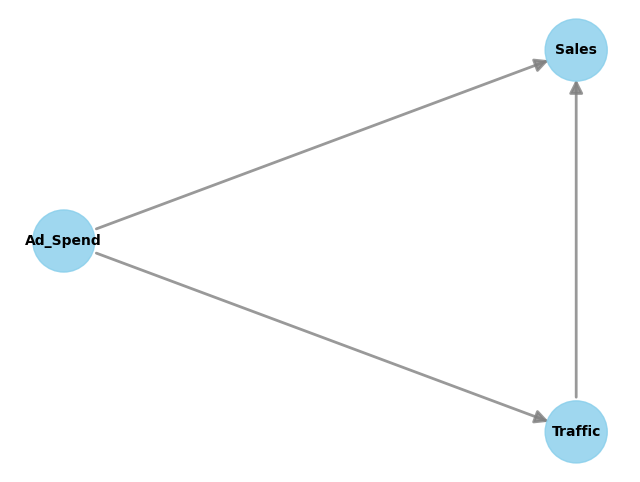

In [3]:
from dowhy import CausalModel

# Define the causal graph
model = CausalModel(
    data=df,
    treatment="Ad_Spend",
    outcome="Sales",
    graph="""
    digraph {
        Ad_Spend -> Traffic;
        Traffic -> Sales;
        Ad_Spend -> Sales;
    }
    """
)

model.view_model()


In [4]:
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("Causal Effect of Ad Spend on Sales:", estimate.value)


Causal Effect of Ad Spend on Sales: 0.6840635025665662


/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [5]:
from sklearn.linear_model import LinearRegression

X = df[["Ad_Spend", "Traffic"]]
y = df["Sales"]

lr = LinearRegression()
lr.fit(X, y)

print("Predictive Model Coefficients:")
print("Ad Spend:", lr.coef_[0])
print("Traffic:", lr.coef_[1])


Predictive Model Coefficients:
Ad Spend: 0.37024219413724974
Traffic: 0.41168221699372815
